In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Library and extern Repositories

In [2]:
import sys
import os

%matplotlib inline


%cd "/content/drive/MyDrive/repos/art-style-challenge/src"

sys.path.append('.')

import cv2
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

%load_ext autoreload
%autoreload 1

print(sys.path)

/content/drive/MyDrive/repos/art-style-challenge/src
['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '.']


for google colab: install requirements

In [ ]:
#!pip list | grep mm

need to update numpy to make it work again

In [3]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.1 MB 30.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [3]:
!pip install openmim
!mim install mmcv-full==1.6.2
!mim install mmdet

!mim install mmpose
!pip install anime-face-detector 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached openmim-0.3.3-py2.py3-none-any.whl (50 kB)
  Using cached model_index-0.1.11-py3-none-any.whl (34 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     |████████████████████████████████| 575 kB 32.5 MB/s 
     |████████████████████████████████| 190 kB 75.4 MB/s 
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     |████████████████████████████████| 1.4 MB 27.3 MB/s 
     |████████████████████████████████| 46.0 MB 10.2 MB/s 
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached yapf-0.32.0-py

import Vidoe extractor!

In [4]:
import video_extractor as video_extractor

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Extract Faces from Images

In [6]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f29eac3d6dfe9612461b740e5e33a0b1d1b96687392c86069ee71cbec5f12081
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [7]:
import anime_extractor as anime_extractor
import realistic_extractor as realistic_extractor

In [11]:
source = '/content/drive/MyDrive/repos/art-style-challenge/data/test_source'
output = '/content/drive/MyDrive/repos/art-style-challenge/data/test_output'
offset_value = 0.1 # expand boarder around face

extractor = anime_extractor.AnimeExtractor()

load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmpose_anime-face_hrnetv2.pth
load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmdet_anime-face_yolov3.pth


success:  ('5a3ad84a9e1acd8214c33574da738ab2', '.jpg')
success:  ('32eeb938c9debb8decc47e523cbd46db', '.jpg')
success:  ('51f9bd8cdfb0249c5e2891914ee06425', '.jpg')
success:  ('4cbf081c4f026860a9cbb50874f0b04d', '.jpg')
success:  ('cd7de86c298584c819d7f935c2df759d', '.jpg')
success:  ('94130f20ab76813cbcecc584d48aad59', '.jpg')


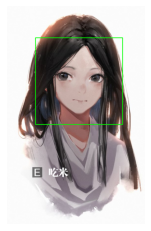

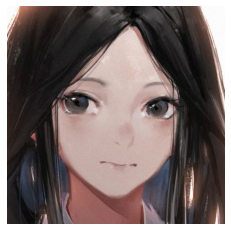

In [13]:
extractor.extract_all(source, output, offset_value)

plt.imshow(cv2.cvtColor(extractor.img_full, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(extractor.img_cropped, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Extract Faces from Videos

In [ ]:
extractor = video_extractor.VideoExtractor()

change these settings:

In [ ]:
movie_name = 'mononoke' #files are going to be named: e.g. movie_name_1.jpg
step_size = 60
start_frame = 0
source = f'/content/drive/MyDrive/repos/art-style-challenge/data/videos/{movie_name}.mp4'
target = f'/content/drive/MyDrive/repos/art-style-challenge/data/{movie_name}' 

for google colab: save folder locally, zip and move later for faster performance

In [ ]:
if os.path.exists(f'/content/{movie_name}') == False:
  os.mkdir(f'/content/{movie_name}')

outdir = f'/content/{movie_name}'


extract faces from video file

In [ ]:
extractor.extract(movie_name, source, target=outdir, step_size=step_size, start_frame=start_frame)

for goolge colab: use to move files to target

In [ ]:
format = f'{movie_name}.zip'

!zip -r /content/$format /content/$movie_name
!mv /content/$format /content/drive/MyDrive/repos/art-style-challenge/data

if os.path.exists(target) == False:
  os.mkdir(target)

!unzip /content/drive/MyDrive/repos/art-style-challenge/data/$format -d $target